# MOON

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x1":X[:,0],
                       "x2":X[:,1],
                       "label":y})
circles.head(10)

,x1,x2,label
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0
5,0.662510,-0.084356,1
6,0.274510,-0.189904,1
7,-0.115556,0.535912,1
8,1.572369,-0.335447,1
9,0.763990,0.962359,0


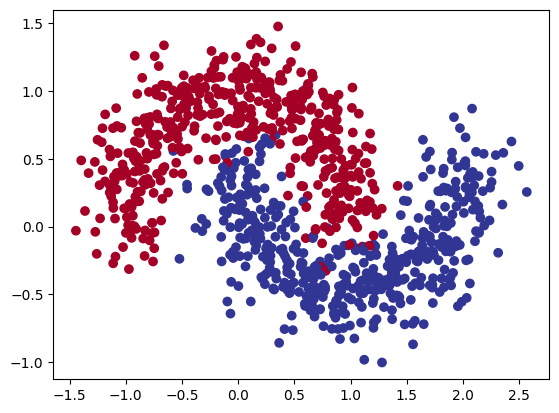

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
import torch
x = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
import torch.nn as nn

class Moon(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=8)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(in_features=8,out_features=8)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(in_features=8,out_features=6)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(in_features=6,out_features=2)

    def forward(self,x):
        x = torch.tanh(self.layer3(torch.tanh(self.layer2(torch.tanh(self.layer1(x))))))
        return self.layer4(x)

In [ ]:
model = Moon()

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.03,weight_decay=5e-4)

In [ ]:
def accuracy_fn(y_true,y_pred) :
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [ ]:
y_logits = model(x_train[:5])
y_logits.shape

torch.Size([5, 2])

In [ ]:
x_train[:5]

tensor([[ 2.1397,  0.3731],
        [-1.2067,  0.4169],
        [-0.2117,  1.1715],
        [-0.0632,  0.9842],
        [ 0.3938, -0.1620]])

In [ ]:
y_logits[:5] , y_logits.ndim,y_logits.shape

(tensor([[ 0.1623, -0.4140],
         [ 0.0806, -0.3415],
         [ 0.0954, -0.4053],
         [ 0.0955, -0.4035],
         [ 0.1036, -0.3782]], grad_fn=<SliceBackward0>),
 2,
 torch.Size([5, 2]))

In [ ]:
torch.manual_seed(42)
for epoch in range(250) :
    model.train()
    y_logits = model(x_train)
    y_preds = torch.argmax(y_logits,dim=1)
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    model.eval()
    with torch.inference_mode():
        test_logits = model(x_test)
        test_preds = torch.argmax(test_logits,dim=1)
        test_loss = loss_fn(test_logits,y_test)
        test_accuracy = accuracy_fn(y_true=y_test,y_pred=test_preds)

    if epoch % 25 == 0 :
        print(f"Epoch: {epoch} | Loss : {loss:.2f},Accuracy : {acc:.2f}% || Test Loss : {test_loss:.2f},Test Accuracy : {test_accuracy:.2f}%")

Epoch: 0 | Loss : 0.73,Accuracy : 50.00% || Test Loss : 0.68,Test Accuracy : 50.00%
Epoch: 25 | Loss : 0.29,Accuracy : 86.88% || Test Loss : 0.29,Test Accuracy : 86.00%
Epoch: 50 | Loss : 0.27,Accuracy : 87.12% || Test Loss : 0.26,Test Accuracy : 85.50%
Epoch: 75 | Loss : 0.24,Accuracy : 88.25% || Test Loss : 0.24,Test Accuracy : 86.00%
Epoch: 100 | Loss : 0.17,Accuracy : 92.75% || Test Loss : 0.14,Test Accuracy : 94.50%
Epoch: 125 | Loss : 0.07,Accuracy : 97.00% || Test Loss : 0.04,Test Accuracy : 99.00%
Epoch: 150 | Loss : 0.06,Accuracy : 97.38% || Test Loss : 0.04,Test Accuracy : 99.00%
Epoch: 175 | Loss : 0.06,Accuracy : 97.62% || Test Loss : 0.05,Test Accuracy : 99.00%
Epoch: 200 | Loss : 0.06,Accuracy : 97.88% || Test Loss : 0.04,Test Accuracy : 99.00%
Epoch: 225 | Loss : 0.06,Accuracy : 97.62% || Test Loss : 0.04,Test Accuracy : 99.00%


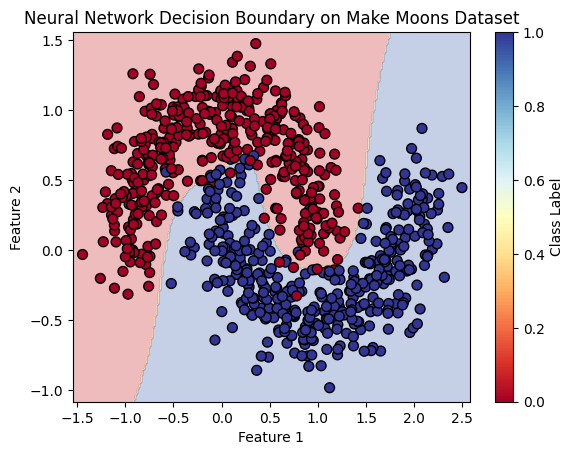

In [ ]:
import matplotlib.pyplot as plt
import torch

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, resolution=0.02):
    # Set up grid for plotting
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, resolution),
                            torch.arange(y_min, y_max, resolution))
    grid = torch.stack([xx.ravel(), yy.ravel()], dim=1)

    # Get model predictions for each point in the grid
    with torch.no_grad():
        Z = model(grid)
    Z = Z.argmax(dim=1).reshape(xx.shape)  # Get the class predictions

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=50)
    plt.title("Neural Network Decision Boundary on Make Moons Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Class Label")
    plt.show()

# Plot the decision boundary on the training data
plot_decision_boundary(model, x_train, y_train)


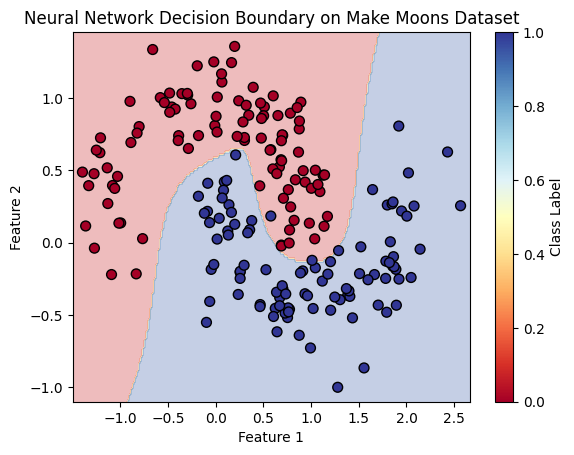

In [ ]:
plot_decision_boundary(model, x_test, y_test)

# Spiral

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

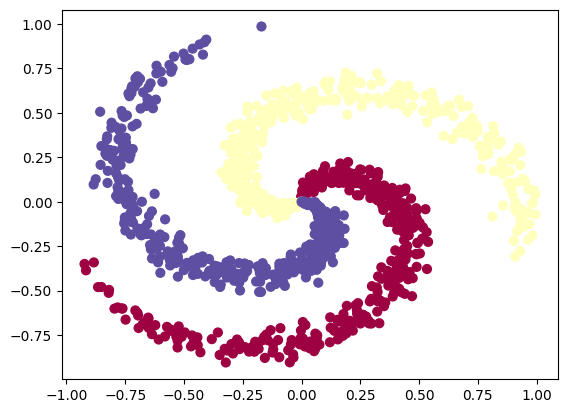

In [ ]:
N = 400 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Epoch [100/1100], Loss: 0.5221
Epoch [200/1100], Loss: 0.1964
Epoch [300/1100], Loss: 0.0981
Epoch [400/1100], Loss: 0.0637
Epoch [500/1100], Loss: 0.0471
Epoch [600/1100], Loss: 0.0375
Epoch [700/1100], Loss: 0.0312
Epoch [800/1100], Loss: 0.0269
Epoch [900/1100], Loss: 0.0236
Epoch [1000/1100], Loss: 0.0211
Epoch [1100/1100], Loss: 0.0191


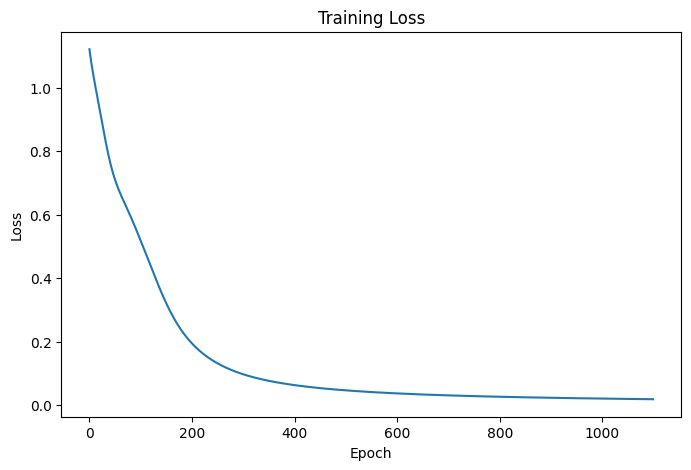

Test Accuracy: 100.00%


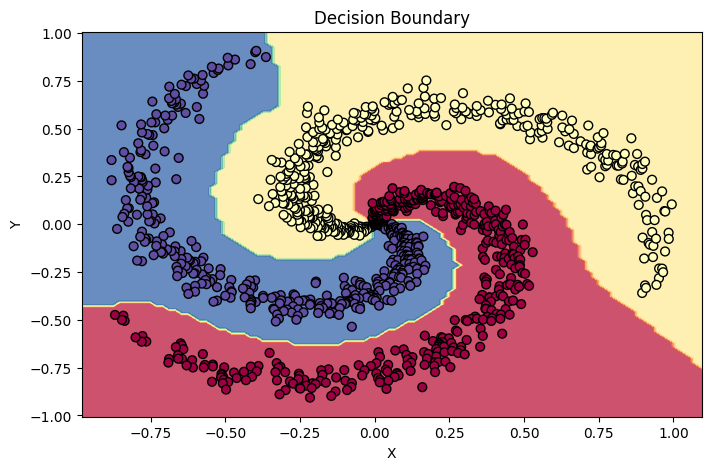

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the neural network
class SpiralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SpiralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

# Hyperparameters
input_size = D
hidden_size = 100
num_classes = K
learning_rate = 0.001
num_epochs = 1100

# Initialize the model
model = SpiralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
losses = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total = y_test.size(0)
    correct = (predicted == y_test).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Plot decision boundaries
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict class for each point in the mesh
    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
    Z = torch.max(Z, 1)[1].detach().numpy().reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("Decision Boundary")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Convert tensors back to numpy for plotting
X_numpy = X_tensor.numpy()
y_numpy = y_tensor.numpy()

# Plot decision boundary
plot_decision_boundary(X_numpy, y_numpy, model)

# Circles

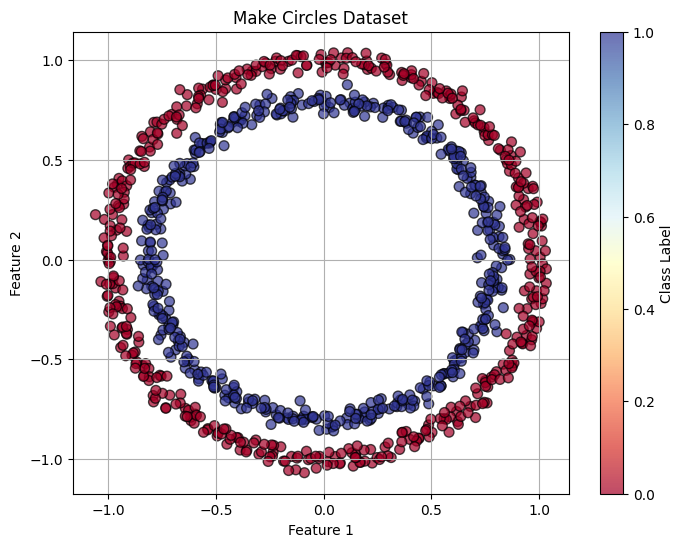

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate the dataset
n_samples = 1000
x, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', alpha=0.7, s=50)
plt.title("Make Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class Label")
plt.grid(True)
plt.show()


Epoch 1/250, Loss: 0.6936
Epoch 51/250, Loss: 0.4425
Epoch 101/250, Loss: 0.0482
Epoch 151/250, Loss: 0.0142
Epoch 201/250, Loss: 0.0080
Accuracy on test set: 100.00%


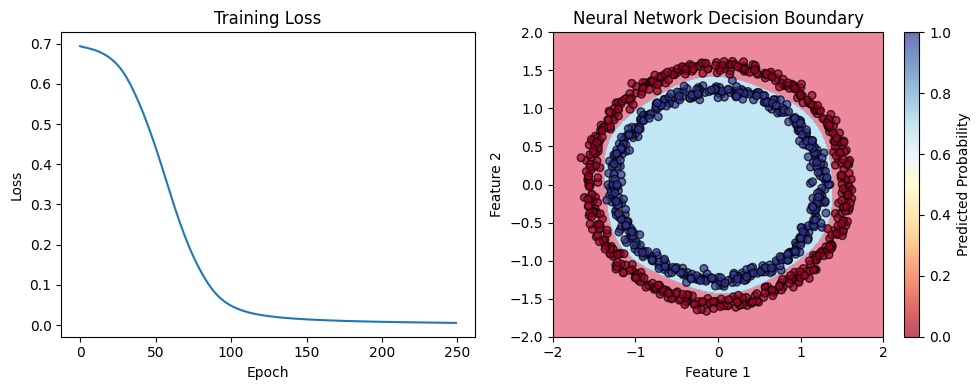

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate the dataset
n_samples = 1000
x, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

# Preprocess the data: scaling it to have mean=0 and variance=1
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Convert the data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 10)  # Input layer to hidden layer with 10 neurons
        self.layer2 = nn.Linear(10, 10)  # Second hidden layer with 10 neurons
        self.layer3 = nn.Linear(10, 1)  # Output layer with 1 neuron

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))  # Sigmoid activation for binary classification
        return x

# Initialize the neural network model
model = SimpleNN()

# Define the loss function (binary cross-entropy) and optimizer
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Using Adam instead of SGD for faster convergence

# Training loop
epochs = 250
losses = []

for epoch in range(epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_train)

    # Compute the loss
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())

    # Zero gradients, backward pass, optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if epoch % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():  # No gradients needed for evaluation
    y_test_pred = model(x_test)
    y_test_pred_binary = (y_test_pred > 0.5).float()  # Convert probabilities to binary labels (0 or 1)
    accuracy = (y_test_pred_binary == y_test).float().mean() * 100
    print(f'Accuracy on test set: {accuracy.item():.2f}%')

# Plot loss over epochs
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot the decision boundary
plt.subplot(1, 2, 2)
xx, yy = torch.meshgrid(torch.linspace(-2, 2, 100), torch.linspace(-2, 2, 100), indexing='ij')
grid = torch.stack([xx.reshape(-1), yy.reshape(-1)], dim=1)
with torch.no_grad():
    Z = model(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx.numpy(), yy.numpy(), Z.numpy(), levels=[0, 0.5, 1], colors=['crimson', 'skyblue'], alpha=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', alpha=0.7, s=30)
plt.title("Neural Network Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Probability")
plt.tight_layout()
plt.show()

# Blobs

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES=2
RANDOM_STATE = 42

x_blob , y_blob = make_blobs(n_samples=1000,n_features=2,centers=4,cluster_std=1.5,random_state=RANDOM_STATE)

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(x_blob[:5],y_blob[:5])

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


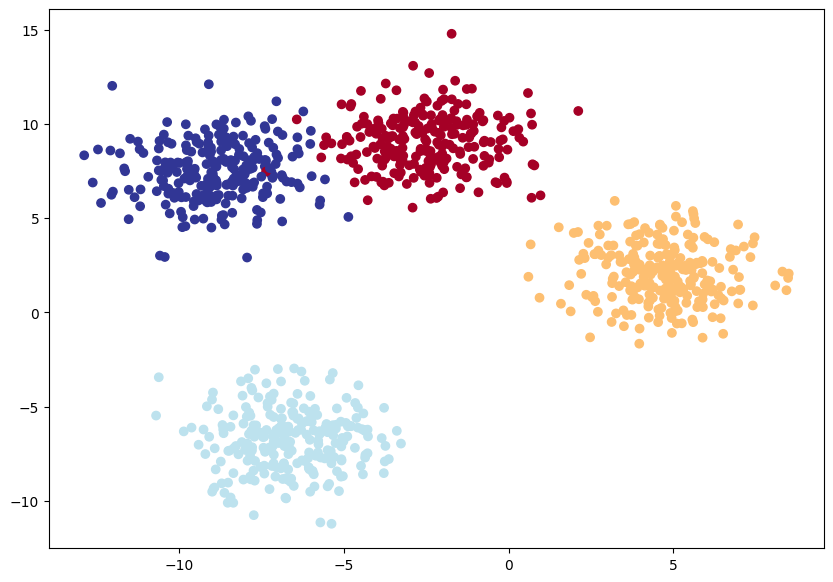

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_blob,y_blob,test_size=0.2,random_state=42)
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [ ]:
from torch import nn
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )
    def forward(self,x):
        return self.linear_stack(x)

In [ ]:
model_temuujin = BlobModel(input_features=NUM_FEATURES,
                           output_features=NUM_CLASSES,
                           hidden_units = 8)
model_temuujin

BlobModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_temuujin.parameters(),lr=0.01)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    total = len(y_true)
    return (correct / total) * 100


In [ ]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs):
    model_temuujin.train()
    y_logits = model_temuujin(x_train)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_temuujin.eval()
    with torch.inference_mode():
        test_logits = model_temuujin(x_test)
        test_probs = torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,y_test)
        test_accuracy = accuracy_fn(y_true=y_test,y_pred = test_probs)

        if epoch % 20 == 0 :
            print(f"Epoch : {epoch} | Loss : {loss:.2f} , Accuracy : {acc:.2f}% || Test Loss : {test_loss:.2f} , Test Accuracy : {test_accuracy:.2f}%")

Epoch : 0 | Loss : 1.59 , Accuracy : 5.25% || Test Loss : 1.45 , Test Accuracy : 28.50%
Epoch : 20 | Loss : 0.76 , Accuracy : 50.12% || Test Loss : 0.72 , Test Accuracy : 53.50%
Epoch : 40 | Loss : 0.14 , Accuracy : 99.25% || Test Loss : 0.12 , Test Accuracy : 99.50%
Epoch : 60 | Loss : 0.03 , Accuracy : 99.25% || Test Loss : 0.02 , Test Accuracy : 99.50%
Epoch : 80 | Loss : 0.03 , Accuracy : 99.25% || Test Loss : 0.02 , Test Accuracy : 99.50%


<ipython-input-44-670b895817b7>:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
<ipython-input-44-670b895817b7>:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, h))


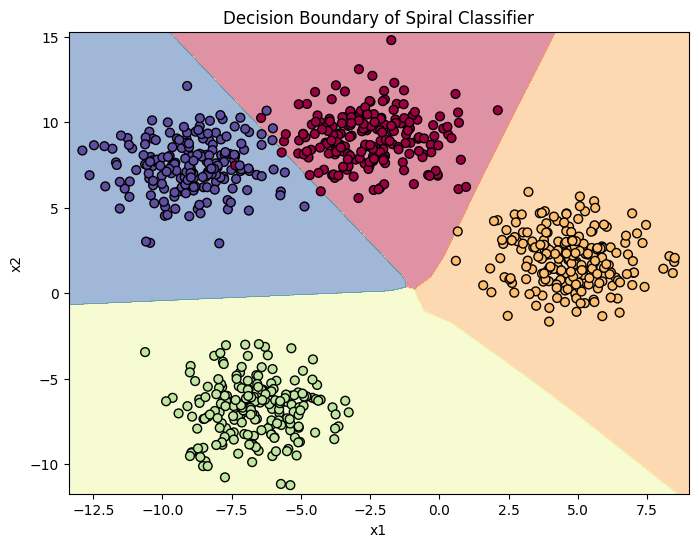

In [ ]:
plot_decision_boundary(model_temuujin,x_train,y_train)